<a href="https://colab.research.google.com/github/fardifa/Machine-Learning-Projects/blob/main/DigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Digit Classification using Keras Deep Learning Model**

Import Library

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

Load Dataset

In [ ]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train[0] #show an image as a 2D matrix of pixel values (0 to 255)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

See Input Image

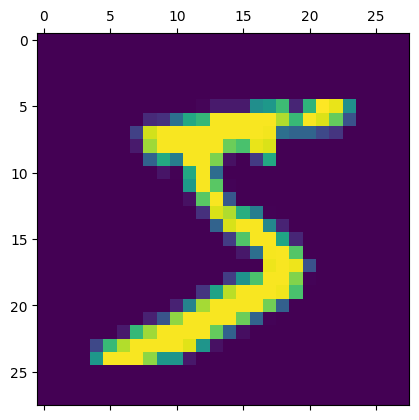

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

Scale Images

In [ ]:
#scaled from 0 to 1, accuracy increases

X_train = X_train/255
X_test = X_test/255


Flatten 2D Array of Image Pixels into 1D

In [ ]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

Implement Model with no Hidden Layer

In [ ]:
model  = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') #get 10 output from28*28 input
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(X_train_flattened,y_train,epochs=5) #where training actually happens

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4686 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3040 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9259


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2679 - accuracy: 0.9248


[0.2679122984409332, 0.9247999787330627]

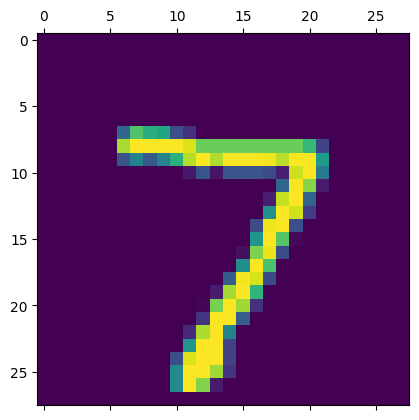

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0] #10 outputs for 1st image

313/313 [==============================] - 1s 2ms/step


array([1.91622507e-02, 4.68631242e-07, 6.52807653e-02, 9.66219068e-01,
       3.17081809e-03, 1.23772532e-01, 1.93132223e-06, 9.99813378e-01,
       1.01007834e-01, 6.49028361e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0]) #shows which of the 10 outputs has the highest probability to be the right answer

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted] #final prediction answer for all images
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Confusion Matrix

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    6,    8,    3,    3,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    9,  917,   21,    8,    3,   13,   10,   44,    4],
       [   1,    0,   16,  944,    1,   12,    2,   10,   17,    7],
       [   1,    1,    2,    1,  926,    0,   12,    4,    9,   26],
       [   7,    3,    3,   46,   11,  754,   19,    7,   35,    7],
       [   7,    3,    7,    1,    7,   11,  918,    2,    2,    0],
       [   1,    5,   20,    8,    9,    0,    0,  952,    3,   30],
       [   3,    8,    6,   29,    9,   22,   10,   13,  868,    6],
       [   8,    7,    2,   11,   35,    6,    0,   26,   12,  902]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

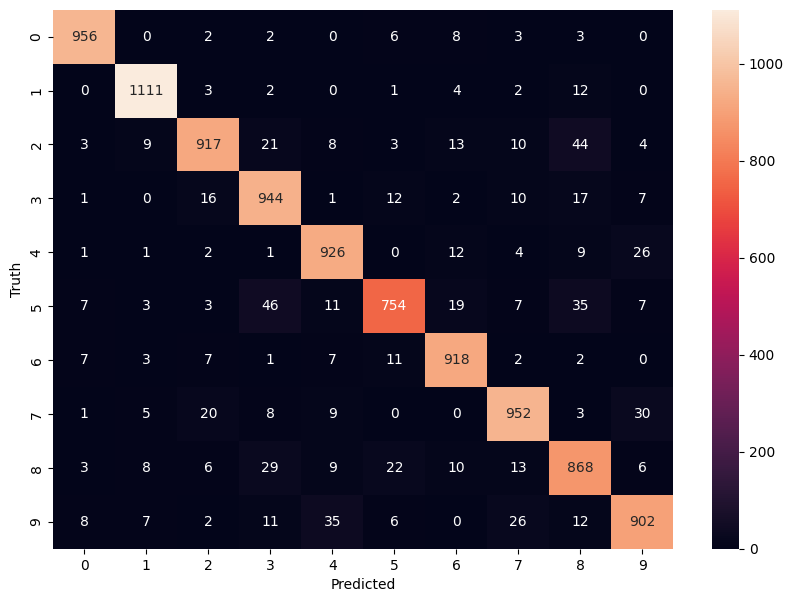

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#finds out errors distribution for example 2 was predicted to be 8 44 times

Implementation of Model with 1 Hidden Layer

In [ ]:
model  = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), #get 100 output from28*28 input
    keras.layers.Dense(10,activation='sigmoid') #hidden layer that gets 10
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(X_train_flattened,y_train,epochs=5) #where training actually happens

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2700 - accuracy: 0.9241
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1229 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0858 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0650 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9845


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0863 - accuracy: 0.9737


[0.08632421493530273, 0.9736999869346619]